<a href="https://colab.research.google.com/github/heesukjang/W210-Capstone---Waste-Sorting/blob/main/WasteSorting_EDA_Sachi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
# from tensorflow.keras.preprocessing import image
from PIL import Image
from collections import Counter
from fractions import Fraction


In [ ]:
# making n X m matrix
def img2np(path, list_of_filename, size = (300, 300)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        im = Image.open(fp, 'r')
        # covert image to a matrix
        img_ts = np.array(im)
        img_ts = img_ts.astype(np.float32) / 255
        try:
            # concatenate different images
            full_mat = full_mat + [img_ts]
        except UnboundLocalError:
            # if not assigned yet, assign one
            full_mat = [img_ts]
    return full_mat

In [ ]:
notebook_path = os.getcwd()
print(notebook_path)

/Users/sachikheny/Documents/MIDS/W210_Capstone


In [ ]:
# run it on our folders
trashbox_path = 'TrashBox/TrashBox/TrashBox_train_dataset_subfolders/'
image_paths = []
labels = []
for foldername in os.listdir(trashbox_path):
    folder = os.path.join(trashbox_path, foldername)
    for root, dirs, files in os.walk(folder):
        # print(os.path.basename(root))
        # Check if the current folder contains any subfolders
        subfolders = [d for d in dirs if os.path.isdir(os.path.join(root, d))]

        # If there are no subfolders, collect images from the current folder
        if not subfolders:
            # print(os.path.basename(root))
            for file in files:
                if file.endswith(".jpg"):
                    image_paths.append(os.path.join(root, file))
                    labels.append(os.path.basename(root))
        else:
            # Iterate through each subfolder
            for subfolder in subfolders:
                # print(os.path.basename(root))
                subfolder_path = os.path.join(root, subfolder)
                for file in os.listdir(subfolder_path):
                    if file.endswith(".jpg"):
                        image_paths.append(os.path.join(subfolder_path, file))
                        labels.append(os.path.basename(subfolder_path))

# Load images and convert them to arrays
images = []
for path in image_paths:
    with Image.open(path) as img:
        img_array = np.array(img)
        images.append(img_array)

X = np.array(images)
y = np.array(labels)

/var/folders/p5/ljxqh61x1y9glhcvw6b65t5c0000gn/T/ipykernel_96933/4019729173.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(images)


In [ ]:
X.shape

(24601,)

In [ ]:
file = open("images_as_arrays.txt", "w+")
content = str(X)
file.write(content)
file.close()

In [ ]:
y.shape

(24601,)

In [ ]:
file = open("labels_of_images.txt", "w+")
content = str(y)
file.write(content)
file.close()

In [ ]:
for classification in np.unique(y):
    classification_str = classification.replace(' ', '_')
    exec(f"{classification_str} = X[y == '{classification}']")

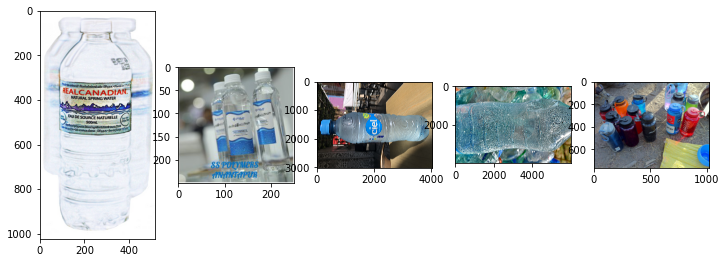

In [ ]:
# Beverage Cans
_, axs = plt.subplots(1,5, figsize = (12,12))
axs = axs.flatten()
for img, ax in zip(plastic_bottles[:5], axs):
    ax.imshow(img)

In [ ]:
data = {'Image_Array': X, 'Classification': y}
df = pd.DataFrame(data)

In [ ]:
df.head()

,Image_Array,Classification
0,"[[[213, 189, 161], [217, 193, 165], [222, 198,...",paper
1,"[[[251, 255, 255], [244, 248, 249], [254, 255,...",paper
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",paper
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",paper
4,"[[[207, 220, 213], [215, 220, 214], [216, 208,...",paper


In [ ]:
print('Number of images: ', len(df))

Number of images:  24601


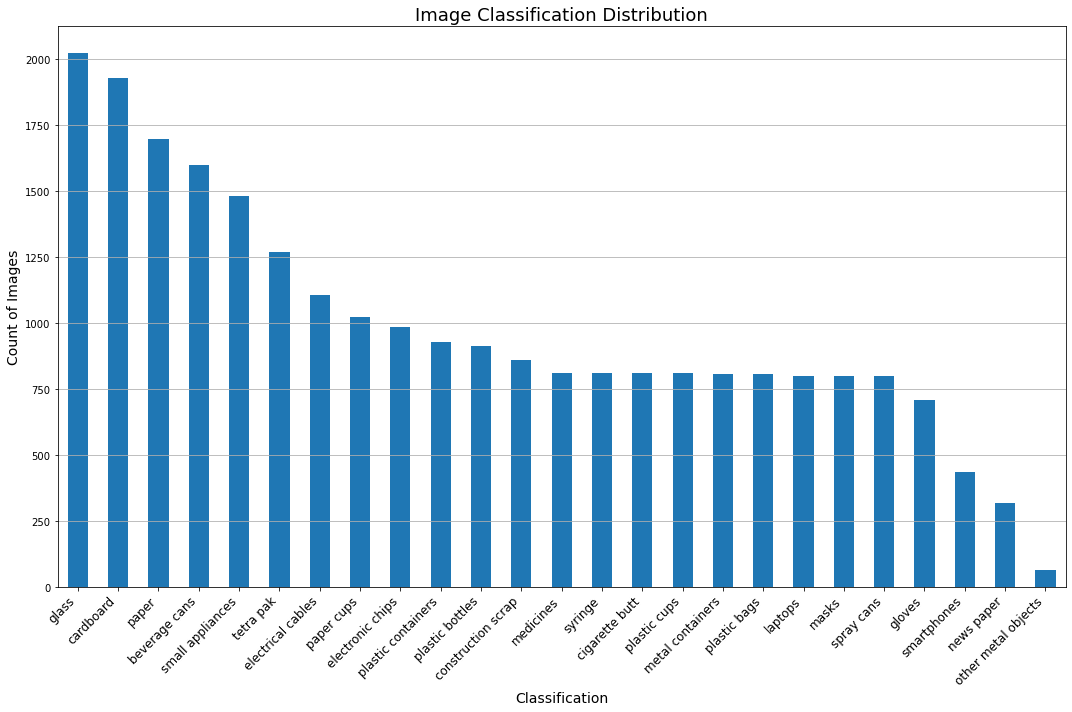

In [ ]:
# Group the DataFrame by 'IClassification' and count the occurrences
classification_counts = df['Classification'].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 10))
classification_counts.plot(kind='bar')
plt.title('Image Classification Distribution', fontsize = 18)
plt.xlabel('Classification', fontsize = 14)
plt.ylabel('Count of Images', fontsize = 14)
plt.xticks(rotation=45, fontsize = 12, ha='right')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df['Image_Shape'] = [(image.shape[0], image.shape[1]) for image in df['Image_Array']]
df['Aspect_Ratio'] = df['Image_Shape'].apply(lambda x: f"{Fraction(x[0], x[1]).numerator}:{Fraction(x[0], x[1]).denominator}")
df.head()

,Image_Array,Classification,Image_Shape,Aspect_Ratio
0,"[[[213, 189, 161], [217, 193, 165], [222, 198,...",paper,"(384, 512)",3:4
1,"[[[251, 255, 255], [244, 248, 249], [254, 255,...",paper,"(384, 512)",3:4
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",paper,"(1300, 1300)",1:1
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",paper,"(500, 800)",5:8
4,"[[[207, 220, 213], [215, 220, 214], [216, 208,...",paper,"(384, 512)",3:4


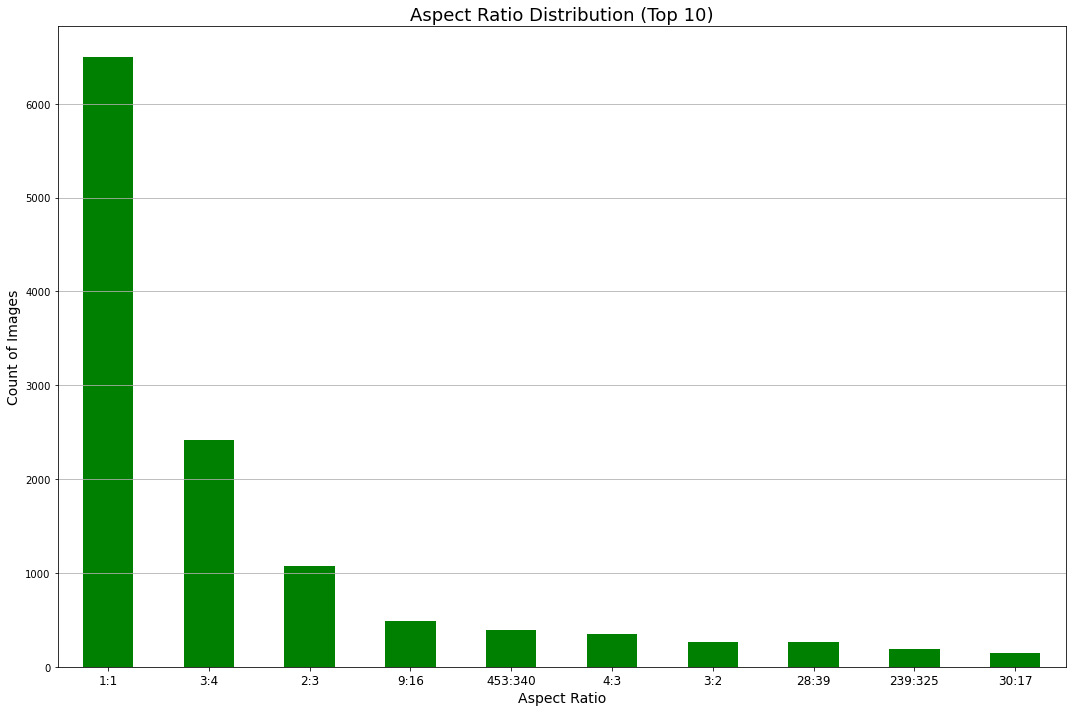

In [ ]:
# Group the DataFrame by 'Aspect_Ratio' and count the occurrences
aspect_ratio_counts = df['Aspect_Ratio'].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 10))
aspect_ratio_counts[:10].plot(kind='bar', color = 'green')
plt.title('Aspect Ratio Distribution (Top 10)', fontsize = 18)
plt.xlabel('Aspect Ratio', fontsize = 14)
plt.ylabel('Count of Images', fontsize = 14)
plt.xticks(rotation=0, fontsize = 12)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
print('Number of different image sizes: ', len(df['Image_Shape'].value_counts()))
print('Number of different aspect ratios: ', len(df['Aspect_Ratio'].value_counts()))

Number of different image sizes:  5033
Number of different aspect ratios:  3850
